# Imports

In [1]:
import importlib
import sys

import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["TORCH_NUM_THREADS"] = "1"

import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../../../ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/data/encoded_data/Sepsis/Sepsis_all_normal_3_train.pkl'
# Load the dataset using torch.load
sepsis_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(sepsis_train_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../../../ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/data/encoded_data/Sepsis/Sepsis_all_normal_3_val.pkl'
# Load the dataset using torch.load
sepsis_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(sepsis_val_dataset))  # Should output something like <class 'torch.utils.data.dataset.TensorDataset'>

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>
<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


### Train Data Insights

In [3]:
# Sepsis Dataset Categories, Features:
sepsis_all_categories = sepsis_train_dataset.all_categories

sepsis_all_categories_cat = sepsis_all_categories[0]
print(sepsis_all_categories_cat)

sepsis_all_categories_num = sepsis_all_categories[1]
print(sepsis_all_categories_num)

for i, cat in enumerate(sepsis_all_categories_cat):
     print(f"Sepsis (3) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"Sepsis (3) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(sepsis_all_categories_num):
     print(f"Sepsis (3) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"Sepsis (3) Amount Category Lables: {num[1]}")

[('concept:name', 18, {'Admission IC': 1, 'Admission NC': 2, 'CRP': 3, 'EOS': 4, 'ER Registration': 5, 'ER Sepsis Triage': 6, 'ER Triage': 7, 'IV Antibiotics': 8, 'IV Liquid': 9, 'LacticAcid': 10, 'Leucocytes': 11, 'Release A': 12, 'Release B': 13, 'Release C': 14, 'Release D': 15, 'Release E': 16, 'Return ER': 17}), ('InfectionSuspected', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('org:group', 27, {'?': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'EOS': 7, 'F': 8, 'G': 9, 'H': 10, 'I': 11, 'J': 12, 'K': 13, 'L': 14, 'M': 15, 'N': 16, 'O': 17, 'P': 18, 'Q': 19, 'R': 20, 'S': 21, 'T': 22, 'U': 23, 'V': 24, 'W': 25, 'X': 26}), ('DiagnosticBlood', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('DisfuncOrg', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('SIRSCritTachypnea', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('Hypotensie', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('SIRSCritHeartRate', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('Infusion', 5, {'EOS': 1, 'False'

### Input Features for Encoder and Decoder

In [4]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in sepsis_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in sepsis_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

"""
# Decoder features:
dec_feat_cat = enc_feat_cat
dec_feat_num = enc_feat_num
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)
"""

# Decoder features:
dec_feat_cat = ['concept:name']
# dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat_num = ['case_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['concept:name', 'InfectionSuspected', 'org:group', 'DiagnosticBlood', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion', 'DiagnosticArtAstrup', 'DiagnosticIC', 'DiagnosticSputum', 'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture', 'SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid', 'lifecycle:transition', 'Diagnose', 'Hypoxie', 'DiagnosticUrinarySediment', 'DiagnosticECG'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day', 'Age', 'Leucocytes', 'CRP', 'LacticAcid']]
Features decoder:  [['concept:name'], ['case_elapsed_time']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length
# seq_len_pred = 4
seq_len_pred = 2

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=sepsis_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('concept:name', 18, {'Admission IC': 1, 'Admission NC': 2, 'CRP': 3, 'EOS': 4, 'ER Registration': 5, 'ER Sepsis Triage': 6, 'ER Triage': 7, 'IV Antibiotics': 8, 'IV Liquid': 9, 'LacticAcid': 10, 'Leucocytes': 11, 'Release A': 12, 'Release B': 13, 'Release C': 14, 'Release D': 15, 'Release E': 16, 'Return ER': 17}), ('InfectionSuspected', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('org:group', 27, {'?': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'EOS': 7, 'F': 8, 'G': 9, 'H': 10, 'I': 11, 'J': 12, 'K': 13, 'L': 14, 'M': 15, 'N': 16, 'O': 17, 'P': 18, 'Q': 19, 'R': 20, 'S': 21, 'T': 22, 'U': 23, 'V': 24, 'W': 25, 'X': 26}), ('DiagnosticBlood', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('DisfuncOrg', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('SIRSCritTachypnea', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('Hypotensie', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('SIRSCritHeartRate', 5, {'EOS': 1, 'False': 2, 'True': 3, nan: 4}), ('Infusion'

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

log_normal_loss_num_feature = []

# Numerical features trained with log-normal loss:
# log_normal_loss_num_feature = ['case_elapsed_time', 'event_elapsed_time']

# Training Configuration

In [7]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="Full_Sepsis_grad_pro_conf")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start learning rate
learning_rate = 1e-5

# Optimizer and Scheduler
# optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate, weight_decay=0)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.01, patience=1, min_lr=1e-9)

# Epochs
num_epochs = 100

# Batch size
batch_size = 128

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term =  1e-4

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more predicted events are used for next event prediction.
teacher_forcing_ratio = 0.75

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

suffix_data_split_value = seq_len_pred

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=sepsis_train_dataset,
                  data_val=sepsis_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature=log_normal_loss_num_feature,
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'Sepsis_full_grad_norm_proactive_conf_check_02.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda
Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(18, 8)
    (1): Embedding(5, 4)
    (2): Embedding(27, 10)
    (3-20): 18 x Embedding(5, 4)
    (21): Embedding(3, 3)
    (22): Embedding(112, 22)
    (23-25): 3 x Embedding(5, 4)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(18, 8)
      (1): Embedding(5, 4)
      (2): Embedding(27, 10)
      (3-20): 18 x Embedding(5, 4)
      (21): Embedding(3, 3)
      (22): Embedding(112, 22)
      (23-25): 3 x Embedding(5, 4)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=139, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=139, out_features=128, bias=True)
      (Uf): Linear(in_features=128, out_features=128, bias=True)
      (Wc): Linear(in_features=139, out_features=128, bias=True)
      (Uc): Linear(in_features=128, out_

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.2249
Validation: Avg Standard Validation Loss: 3.8876
Validation: Avg Attenuated Validation Loss: 3.8593
Validation Loss for Scheduler: 3.8876
saving model
Epoch [2/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.1942
Validation: Avg Standard Validation Loss: 3.8863
Validation: Avg Attenuated Validation Loss: 3.8573
Validation Loss for Scheduler: 3.8863
saving model
Epoch [3/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.1744
Validation: Avg Standard Validation Loss: 3.8817
Validation: Avg Attenuated Validation Loss: 3.8505
Validation Loss for Scheduler: 3.8817
saving model
Epoch [4/100], Learning Rate: 1e-05, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.1746
Validation: Avg Standard Validation Loss: 3.8738
Validation: Avg Attenuated Validation Loss: 3.8404

# Training Visualization

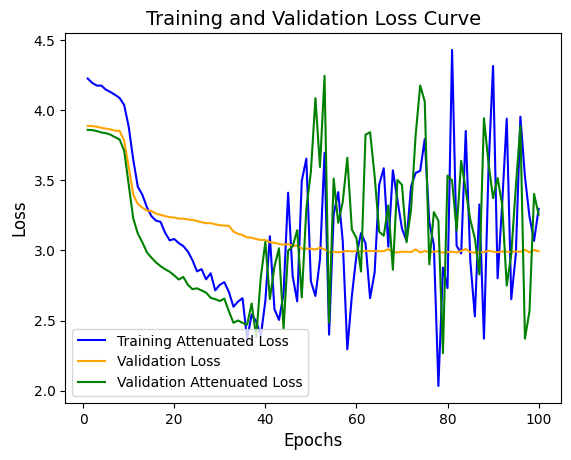

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()